In [66]:
#Import libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
bank_df = pd.read_csv("bank-full.csv")
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
#Dataframe dimensions
bank_df.shape

(45211, 17)

In [15]:
#Dropping the duplicates
bank_df = bank_df.drop_duplicates()

In [24]:
# Check if any null values.
bank_df.isnull().values.any()

False

No missing or null values

In [16]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


1. This dataset contains 16 predictors and one target variable (Target). 
2. We have 17 variables (7 numeric and 11 categorical/string) and 45211 non-duplicate rows for each variable.  
3. Target variable value is categorical as its either yes or no.


In [22]:
#Finding unique values in each column
print("Printing unique values for column with object data type")
for feature in bank_df.columns:    
    if bank_df[feature].dtype == 'object':
        print("{0} :{1} ".format(feature,bank_df[feature].unique()))

Printing unique values for column with object data type
job :['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student'] 
marital :['married' 'single' 'divorced'] 
education :['tertiary' 'secondary' 'unknown' 'primary'] 
default :['no' 'yes'] 
housing :['yes' 'no'] 
loan :['no' 'yes'] 
contact :['unknown' 'cellular' 'telephone'] 
month :['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 
poutcome :['unknown' 'failure' 'other' 'success'] 
Target :['no' 'yes'] 


#Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 

#We will convert all the variables of the type “object” into categorical variables, so that algorithm can use them properly.


In [26]:
# categorical columns
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']

for column in cat_columns: #Looping through object columns
    bank_df[column] = bank_df[column].astype('category')

In [27]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 3.2 MB


In [30]:
# class distribution
print(bank_df['Target'].value_counts())

no     39922
yes     5289
Name: Target, dtype: int64


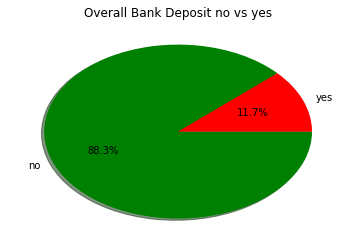

In [34]:
#overall 500 healthy and 268 are diabetic
# Lets plot the pie chart to find out the percent of Healthy and Diabetic in our dataset
colors = ['g', 'r']
labels = ['no', 'yes']
Total = bank_df['Target'].groupby(by=bank_df['Target']).value_counts()
plt.pie(Total, colors=colors, labels=labels, explode=None, autopct='%1.1f%%',counterclock=False, shadow=True)
plt.title('Overall Bank Deposit no vs yes')
plt.show()

In our dataset, we have 88% records where Target='no' so it means If we take probability of 'no'  39922/45211 = 88%, it means we can classify new data as Target='no' with 88% accuracy without any algorithm.

# Categorical Data

The easiest way to understand the distribution of the categorical variables would be to plot bar plots. 

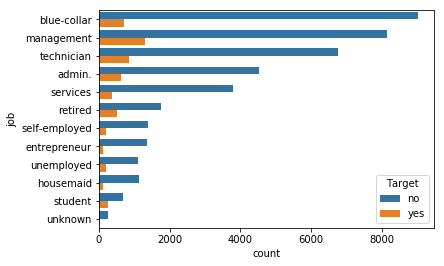

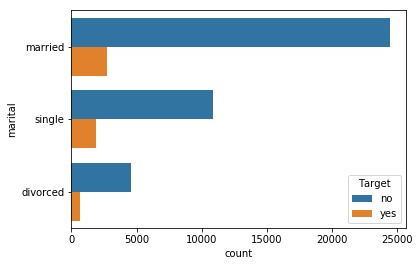

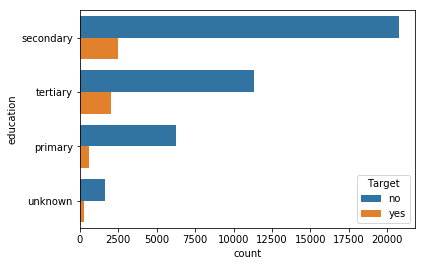

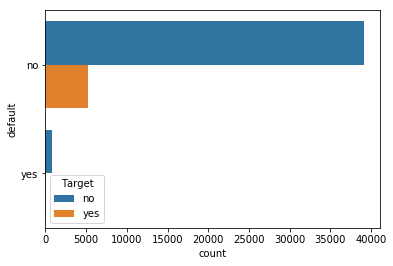

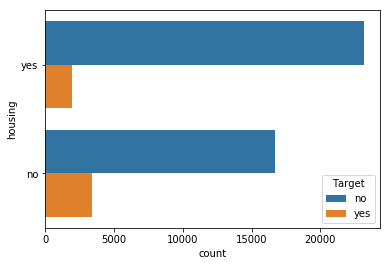

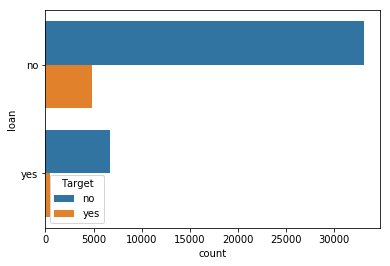

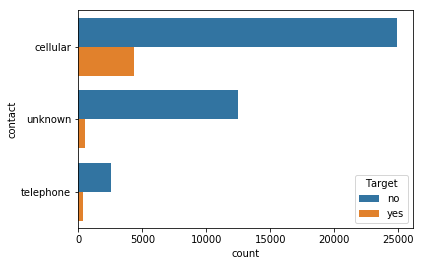

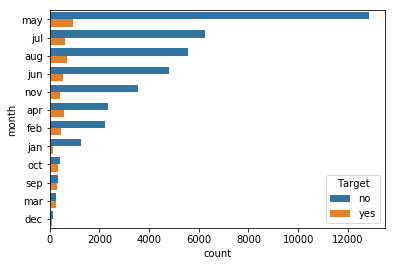

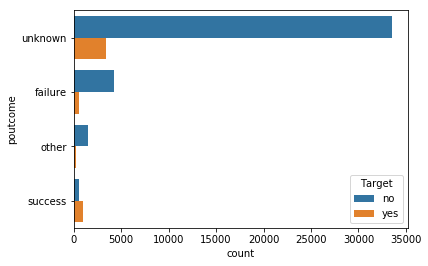

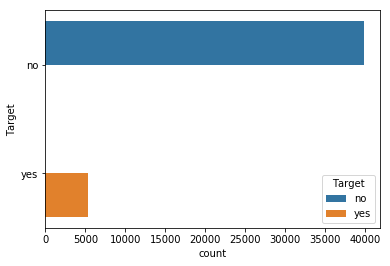

In [39]:
#Bar plots of categorical features
for feature in bank_df.dtypes[bank_df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=bank_df, hue=bank_df['Target'], order = bank_df[feature].value_counts().index)
    plt.show()

In [80]:
#Finding % values in each column for unique values
print("Printing unique values for column with object data type")
for feature in bank_df.dtypes[bank_df.dtypes == 'category'].index:
    print("{0}".format(feature))
    print("{0} \n".format((bank_df[feature].value_counts()/(bank_df[feature].count()))*100))

Printing unique values for column with object data type
job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64 

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64 

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64 

default
no     98.197341
yes     1.802659
Name: default, dtype: float64 

housing
yes    55.583818
no     44.416182
Name: housing, dtype: float64 

loan
no     83.977351
yes    16.022649
Name: loan, dtype: float64 

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64 

month
may    30.44834

# Observations

1. Job: 
      About 68% of all types of jobs in the dataset belong to just 4 categories — admin, blue-collar, management and technician. There is a small proportion of unknown job types, which can be dropped from the dataset.
  
2. Marital
    The distribution of this variable is relatively balanced between the married and single (single + divorced) individuals. There is a small proportion of people with unknown marital status, which can be dropped from the dataset.

3. Education
    Around 51% of targeted individuals have secondary school eduction. There is a relatively small number of respondents with an unknown education level, which can be dropped from the dataset.
    
4. Default
    There is a very small number (around 2%) of respondents who defaulted on a credit, so this variable doesn’t look very useful for prediction purposes and can be dropped from the dataset.
    
5. Housing
    There is an almost even split between the respondents that have a housing loan and those that don’t.
    
6. Loan
    Most of the respondents don’t have a personal loan. 
  
7. contact
    More than 64% of all respondents were contacted via a cellular phone. we have 28% unknown contact type which is very high and cant be dropped.
 
8. Month
    Most of the respondents were contacted during the summer months, with more than 30% of all contacts happening in May. The month of contact can have a substantial impact on the desire to subscribe for a deposit (e.g., many people may be receiving salary bonuses at the end of the calendar year, which could be a good time to contact them about the deposit). 
    
9. poutcome
    More than 81% of respondents status is unknown in previous marketing campaigns which is very high number.
    
10. target
    Only 11% of the respondents to the current campaign have actually subscribed for a deposit as a result of the campaign. This makes our data set highly imbalanced and requires application of special methods to compensate for it — a model built on this imbalanced data set without using any balancing approaches can be correct 88% of the time if it simply predicts “no” as a result and ignores the positive responses altogether.

# Numerical Data

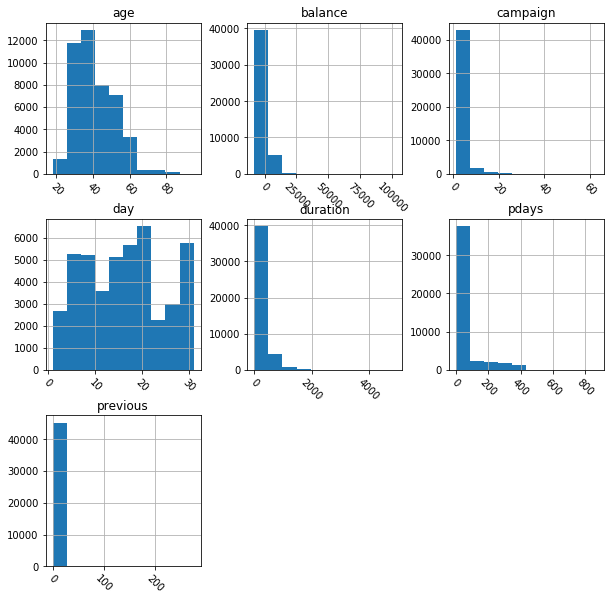

In [47]:
#Histogram grid
bank_df.hist(figsize=(10,10), xrot=-45)

#Clear the text "residue"
plt.show()

In [48]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Observations
1. Most of the columns which has data type other than numeric are missing from the above analysis.

2. For all the predictors, the mean is greater than the median. This means that the tail of the distribution is longer on the right hand side than on the left hand side.

3. There are no null or missing values in the dataset

# Transform Data

To prepare the data set for using in a predictive model, we’ll remove the unknown values, redundant variables and combine the sparse classes into more general categories. The cleaned data set will be saved in the df_cleaned data frame.

In [74]:
#Creating a copy of the original data frame
bank_df_copy = bank_df.copy()

#Dropping the unknown job level
bank_df_copy = bank_df_copy[bank_df_copy.job != 'unknown']

#Dropping the unknown marital status
bank_df_copy = bank_df_copy[bank_df_copy.marital != 'unknown']

#Dropping the unknown  education level
bank_df_copy = bank_df_copy[bank_df_copy.education != 'unknown']

#Deleting the 'default' column
del bank_df_copy['default']


We have 2 variables that define if a respondent is a new or existing customer — “poutcome” (previously contacted by a marketing campaign) and “pdays” (days since the previous marketing contact). For the new customer, “poutcome” would have a value of “unknown” and “pdays” would have a value of “-1”. Let’s see if we have the same number of respondents for each of these levels:

In [76]:
bank_df_copy['poutcome'].value_counts()

unknown    35286
failure     4709
other       1774
success     1424
Name: poutcome, dtype: int64

In [61]:
bank_df_copy['pdays'].value_counts()

-1      35281
 182      151
 92       138
 183      120
 91       115
 181      114
 370       94
 184       84
 364       72
 94        70
 175       70
 95        70
 350       68
 343       65
 185       62
 93        61
 188       60
 349       57
 186       56
 96        55
 174       55
 189       54
 363       53
 196       51
 365       51
 97        50
 90        50
 98        48
 357       48
 368       48
        ...  
 550        1
 396        1
 492        1
 434        1
 655        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 687        1
 495        1
 524        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 45         1
 32         1
Name: pdays, Length: 557, dtype: int64

This is almost similar number (poutcome = 35286 and pdays[-1]=35281)

Let’s check another variable, ‘previous’, which contains the number of customer contacts performed before the current campaign. A zero value would indicate the new customers.

In [77]:
bank_df_copy['previous'].value_counts()

0      35281
1       2651
2       2004
3       1096
4        693
5        443
6        268
7        195
8        127
9         88
10        63
11        60
12        42
13        36
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         4
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

c:\programdata\anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


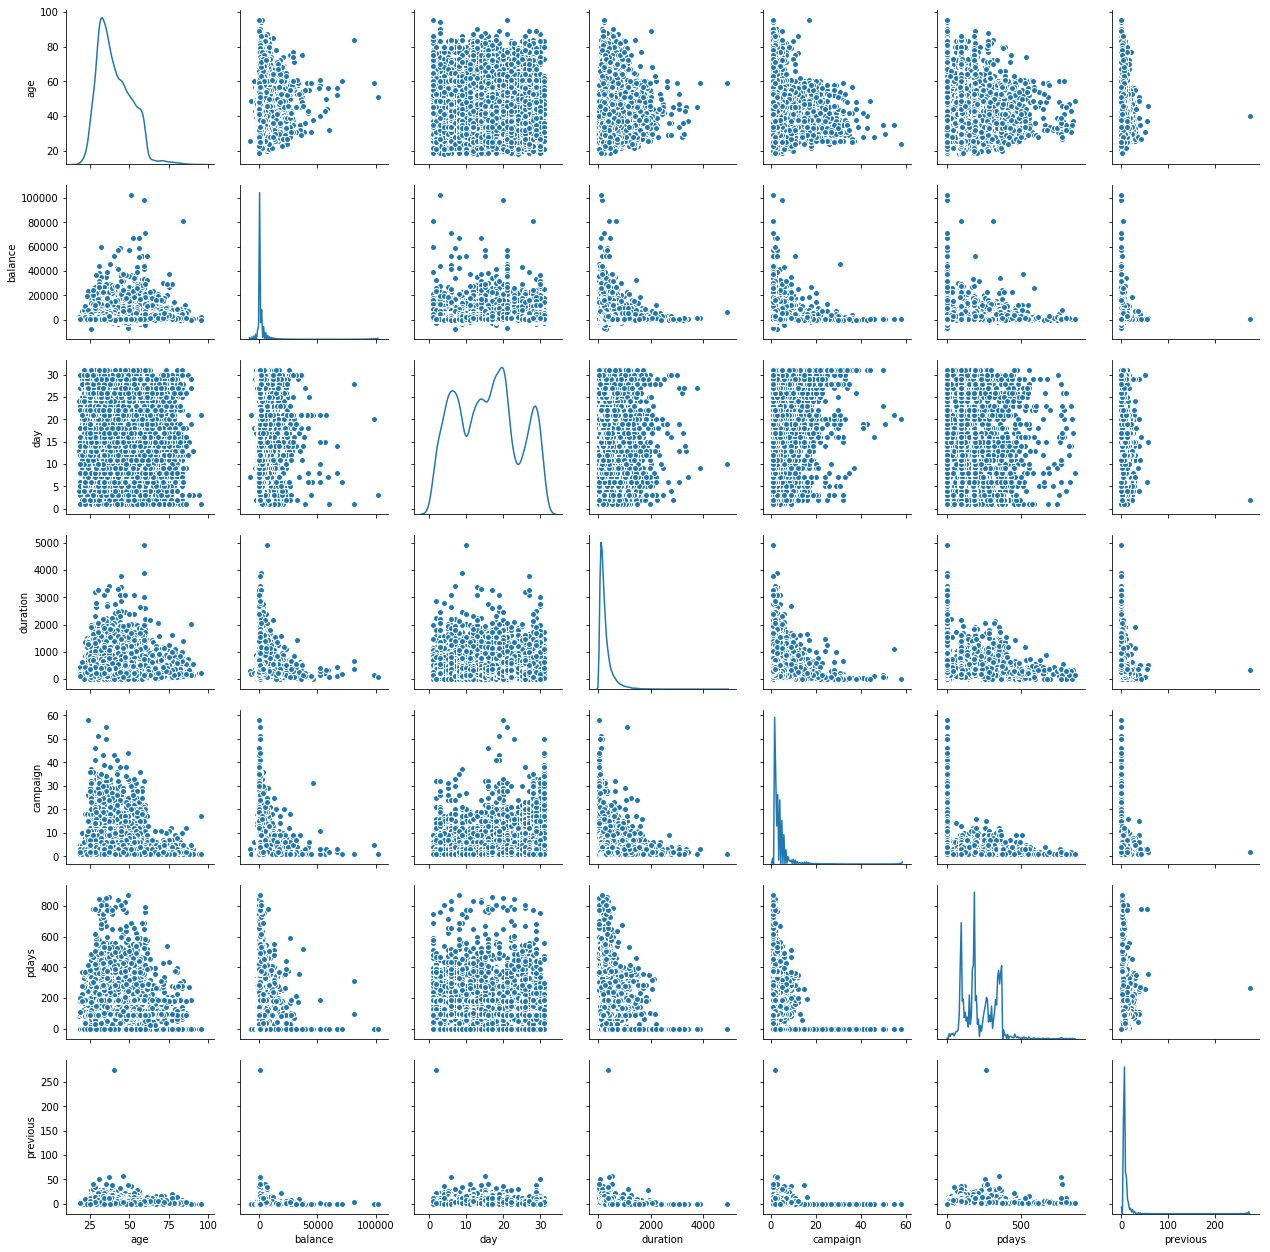

In [65]:
sns.pairplot(bank_df_copy, diag_kind='kde')

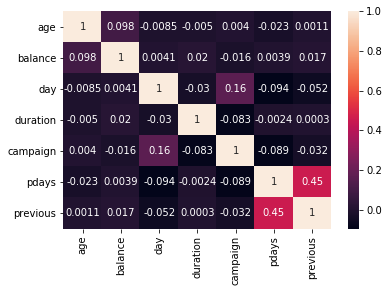

In [78]:
corr = bank_df_copy.corr()
sns.heatmap(corr,annot=True,)

In [67]:
bank_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 16 columns):
age          43193 non-null int64
job          43193 non-null category
marital      43193 non-null category
education    43193 non-null category
balance      43193 non-null int64
housing      43193 non-null category
loan         43193 non-null category
contact      43193 non-null category
day          43193 non-null int64
month        43193 non-null category
duration     43193 non-null int64
campaign     43193 non-null int64
pdays        43193 non-null int64
previous     43193 non-null int64
poutcome     43193 non-null category
Target       43193 non-null category
dtypes: category(9), int64(7)
memory usage: 4.3 MB


In [82]:
for feature in bank_df_copy.dtypes[bank_df_copy.dtypes == 'category'].index:
    bank_df_copy[feature] = pd.Categorical(bank_df_copy[feature]).codes # Replace strings with an integer

In [83]:
# splitting data into training and test set for independent attributes
X = bank_df_copy.iloc[:,0:15]
y = bank_df_copy.iloc[:,15]
test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [84]:
#I'm going to use Random Forest and this can be used only with Decision Tree

#So lets start with decision tree first

dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [85]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [86]:
dt_model.score(X_test , y_test)

0.879148016669239

In [87]:
dt_model.score(X_train, y_train)   #Overfit due to large complext tree. No training error , poor test performance

1.0

In [88]:
y_predict = dt_model.predict(X_test)
#Calculate the accuracy using Confusion Matrix.
from sklearn import metrics

print(metrics.confusion_matrix(y_test, y_predict))

[[10664   792]
 [  774   728]]


In [90]:
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93     11456
          1       0.48      0.48      0.48      1502

avg / total       0.88      0.88      0.88     12958



In [91]:
score = metrics.accuracy_score(y_test, y_predict,normalize=True, sample_weight=None)
print("Accuracy score : {0} %".format(round(score*100,3)))

Accuracy score : 87.915 %


# Drawbacks of Decision Tree.
1. There is a high probability of overfitting in Decision Tree.
2.Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
3. Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
4. Calculations can become complex when there are many class labels.

# Advantages of Decision Tree.

1. Decision Trees are easy to explain. It results in a set of rules.
2. It follows the same approach as humans generally follow while making decisions.
3. Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
4. The Number of hyper-parameters to be tuned is almost null.

# Ensemble Learning - Bagging

In [92]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(X, y)
print(bgcl.oob_score_)

0.9035260343111152


With Bagging accuracy score improved from 87% (base model) to 90%, this is good improvement

# Ensemble Learning - AdaBoosting

In [94]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [95]:
y_pred = abcl.predict(X_test)
abcl.score(X_test , y_test)

0.8786849822503473

With AdaBoosting, dont see any improvment over base model

# Ensemble Learning - GradientBoost

In [96]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train, y_train)

In [97]:
y_pred = gbcl.predict(X_test)
gbcl.score(X_test , y_test)

0.907007254205896

With GridientBoost, we see 3% imrpovement over base model

# Ensemble RandomForest Classifier
A random forest is considered an ensemble model in itself, since it is a collection of decision trees combined to make a more accurate model.

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(X_train, y_train)

In [99]:
y_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.895817255749344

With RandomFOrest, we see 2% improvment over base model 

# Regularising the Decision Tree

1. max_depth
  The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. 
 
2. min_samples_split
  min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. 

3. min_samples_leaf
min_samples_leaf is The minimum number of samples required to be at a leaf node. 

4. max_features
max_features represents the number of features to consider when looking for the best split.





In [102]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf=5 )
dt_model.fit(X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [103]:
print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))  # Relatively less overfit as training and test error are similar

0.8914172316851331
0.8974378762154653


In [104]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf=5 )
dt_model.fit(X_test, y_test)

print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test)) 

0.893765503555482
0.928924216700108


In [105]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 20, min_samples_leaf=5 )
dt_model.fit(X_test, y_test)

print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test)) 

0.8809657681494956
0.953387868498225


In [106]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, min_samples_leaf=5 )
dt_model.fit(X_test, y_test)

print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test))

0.8810649909045808
0.9540052477234141


With increase in max_depth to 20 from 5, we see imrpovement in the model 6% and if further increase it to 30 but dont see much change so 20 would be good max_depth for this

In [107]:
dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, min_samples_leaf=5 )
dt_model.fit(X_test, y_test)

print(dt_model.score(X_train , y_train))
print(dt_model.score(X_test , y_test)) 

0.8848685298495121
0.9512270412100633


We see similar performance for gini and entropy